
Author    : Erkhembayar J.

Purpose   : Advanced Training for AI Drug Discovery (Educational Purpose)

File      : graph_is_all_you_need.ipynb

Korea AI Center for Drug Discovery and Development (KAICD) 2020


# **Coding Session Environment Setting**
---

## Graph Library Installation

In [ ]:
!pip install networkx nx_altair dgl dgllife

## Miniconda and RDKIT installation

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-latest-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

conda install -q -y --channel defaults conda python=3.7
conda update -q -y --channel defaults --all --yes
conda install -q -y -c conda-forge rdkit

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed
Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following NEW packages will be INSTALLED:

  boost              conda-forge/linux-64::boost-1.74.0-py37h48f8a5e_1
  boost-cpp          conda-forge/linux-64::boost-cpp-1.74.0-h935

--2020-11-10 17:54:35--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-11-10 17:54:35--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.4’

     0K .......... .......... .......... .......... ..........  0% 45.5M 2s
    50K .......... .......... .......... .......... ........

## Libraries used in coding session
* networkx, dgl - graph library
* rdkit - library for chemistry
* dgllife - graph library for chemistry and biology

## **WHAT WILL YOU LEARN ?**

<!-- ![picture]() -->
<p align="center">
  <img src='https://drive.google.com/uc?id=1D1n_XNCGPlsx2ueh3Ubuh5OCG1HbV66V' />
</p>



## COLAB LIBRARY SETTING
* System python path: '/usr/local/lib/python3.6/dist-packages/'
* Conda python path: '/usr/local/lib/python3.7/site-packages/'

In [ ]:
import sys
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

## Adding conda into system path

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!export DGLBACKEND=pytorch

In [ ]:
import torch
import dgl
import dgllife
import rdkit

print(f'Pytorch version: {torch.__version__}')
print(f'DGL version: {dgl.__version__}')
print(f'DGLlife version: {dgllife.__version__}')
print(f'RDKIT version: {rdkit.__version__}')


Using backend: pytorch


Pytorch version: 1.7.0+cu101
DGL version: 0.5.2
DGLlife version: 0.2.6
RDKIT version: 2020.09.1


#**How to Construct Your Own Graph** (basics)




Example Graph
<!-- ![picture]() -->
<p align="center">
  <img src='https://drive.google.com/uc?id=13C_XlRls-pczgxqyrS_eodxS6R9kcH-W' />
</p>



In [ ]:
node_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

for index, name in enumerate(node_names):
    print(f'{index}: {name}')

0: A
1: B
2: C
3: D
4: E
5: F
6: G


## A Graph

\begin{align}
\mathcal{G} = (\mathcal{V}, \mathcal{E}),  \text{where } \mathcal{V}\in  \text{a set of vertices },  \mathcal{E} \subseteq (\mathcal{u},\mathcal{v}) \tag{1}
\end{align}


In [ ]:
# nodes 
nodes = [0, 1, 2, 3, 4, 5, 6]

# edges 
edges = [(0, 1), 
         (1, 2), (1, 3), (1, 4), 
         (2, 5),
         (5, 6),
         (6, 3)
        ]


In [ ]:
len(nodes), len(edges)

(7, 7)

In [ ]:
# simpl graph class
from dataclasses import dataclass
from typing import Any


@dataclass
class Graph:
    """"
    Simple graph object

    Parameters
    ----------
    nodes: Any
        Nodes of graph
    edges: Any 
        Edges of graph
    """

    nodes: Any=None
    edges: Any=None 

    def num_nodes(self) -> int:
        return len(nodes)

    def num_edges(self) -> int:
        return len(edges)

    def info(self) -> None:
        print(f"# of nodes: {self.num_nodes()}\n# of edges: {self.num_edges()}")

    def your_function(self):
        NotImplemented 




my_graph = Graph(nodes=nodes, edges=edges)



In [ ]:
my_graph.info()

# of nodes: 7
# of edges: 7


## Using Existing Libraries and Visualization
---
* networkx 
* dgl
    * for graph deep learning

### Networkx library
link: [Networkx website](https://networkx.org/)

In [ ]:
import networkx as nx

nx_g = nx.Graph()


nx_g.add_nodes_from(nodes) # add nodes list 
nx_g.add_edges_from(edges) # add edges from tuple
nx.info(nx_g)

'Name: \nType: Graph\nNumber of nodes: 7\nNumber of edges: 7\nAverage degree:   2.0000'

In [ ]:
nx_g

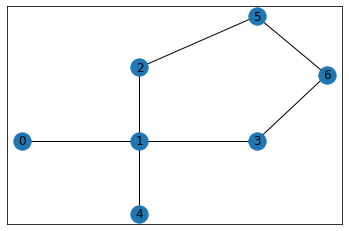

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

pos = {0: (10, 10), 1: (15, 10), 2: (15, 20), 3: (20, 10), 4: (15, 0), 5: (20, 27), 6: (23, 19)}
nx.draw_networkx(nx_g, pos)

Labels and Edges
<!-- ![picture]() -->
<p align="center">
  <img src="https://drive.google.com/uc?id=1ret2wNIt11XZRAr-jtKXpTFnMahYUEqT" />
</p>



In [ ]:
initial_knowdledges = [1, 0, 0, 0, 0, -1, 0]
initial_weights = [0.4, 0.4, 0.4, 0.9, 0.1, 0.4, 0.1]



In [ ]:
nx_g.nodes(), nx_g.edges()

(NodeView((0, 1, 2, 3, 4, 5, 6)),
 EdgeView([(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (5, 6)]))

In [ ]:
for (node,  init_h) in zip(nx_g.nodes(), initial_knowdledges):
    nx_g.nodes[node]['h'] = init_h


for edge, init_w in zip(nx_g.edges(), initial_weights):
    nx_g.edges[edge]['weights'] = init_w


In [ ]:
import nx_altair as nxa

viz = nxa.draw_networkx(
    nx_g, pos=pos,
    node_color='h',
    cmap='viridis',
    width='weights',
    edge_color='black',
)

viz.interactive()

alt.LayerChart(...)

### DGL library
---
link: [DGL website](https://docs.dgl.ai/en/latest/)
 - pytorch, mxnet
 - GCN, GAT, GraphSage etc (~ over 30 graph paper models)
 - backed by amazon


In [ ]:
nodes, edges

([0, 1, 2, 3, 4, 5, 6],
 [(0, 1), (1, 2), (1, 3), (1, 4), (2, 5), (5, 6), (6, 3)])

In [ ]:
# dgl Graph need (u:List, v:List) information
u = []
v = []
for edge in edges:
    u.append(edge[0])
    v.append(edge[1])

#### dgl graph from edges

In [ ]:
import torch
import dgl

dgl_g = dgl.graph((u,v))

In [ ]:
dgl_g

Graph(num_nodes=7, num_edges=7,
      ndata_schemes={}
      edata_schemes={})

#### dgl graph from networkx

In [ ]:
dgl_from_nx = dgl.from_networkx(nx_g)
dgl_from_nx

Graph(num_nodes=7, num_edges=14,
      ndata_schemes={}
      edata_schemes={})

### **Node and Edge Features**

<!-- ![picture]() -->
<p align="center">
  <img src="https://drive.google.com/uc?id=1-XJPrpPIUdtgZcFoRdCp_S90tkpS0249" />
</p>


In [ ]:
## let`s create imaginary problem 
import pandas as pd

ages = [40, 30, 20, 45, 40, 20, 34]
heights = [165, 175, 170, 165, 175, 200, 190]

labels = ['A', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'B', 'Unknown']
weights  = initial_weights          # initial_weights = 

## dataframe holds node information
node_df = pd.DataFrame(list(zip(nodes, ages, heights, labels)), columns=['id', 'age', 'heights', 'labels'])

## dataframe holds edge information
edge_df = pd.DataFrame(list(zip(u, v, weights)), columns=['src', 'dst', 'weights'])


In [ ]:
node_df


,id,age,heights,labels
0,0,40,165,A
1,1,30,175,Unknown
2,2,20,170,Unknown
3,3,45,165,Unknown
4,4,40,175,Unknown
5,5,20,200,B
6,6,34,190,Unknown


In [ ]:
edge_df

,src,dst,weights
0,0,1,0.4
1,1,2,0.4
2,1,3,0.4
3,1,4,0.9
4,2,5,0.1
5,5,6,0.4
6,6,3,0.1


In [ ]:
dgl_g

Graph(num_nodes=7, num_edges=7,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
dgl_g.nodes()

tensor([0, 1, 2, 3, 4, 5, 6])

#### Add nodes and features (DGL)


> The nodes and edges of a DGLGraph can have several user-defined named features for storing graph-specific properties of the nodes and edges. These features can be accessed via the ndata and edata interface.

* <font color='red'>ndata</font>:: node features
* <font color='red'>edata</font>: edge features

<font color='red'>Only features of numerical types </font>

In [ ]:
import torch.nn.functional as F

# adding node features
dgl_g.ndata['ages'] = torch.tensor(ages,dtype=torch.float)/ 100
dgl_g.ndata['heights'] = torch.tensor(heights, dtype=torch.float) / 100

_classes = torch.tensor([label == 'A' for label in labels]).long()
dgl_g.ndata['labels'] = _classes
dgl_g.ndata['labels_one_hot'] = F.one_hot(_classes)
# adding edge features
dgl_g.edata['weights'] = torch.tensor(weights)


In [ ]:
dgl_g.ndata

{'ages': tensor([0.4000, 0.3000, 0.2000, 0.4500, 0.4000, 0.2000, 0.3400]), 'heights': tensor([1.6500, 1.7500, 1.7000, 1.6500, 1.7500, 2.0000, 1.9000]), 'labels': tensor([1, 0, 0, 0, 0, 0, 0]), 'labels_one_hot': tensor([[0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0]])}

In [ ]:
dgl_g.edata['weights']

tensor([0.4000, 0.4000, 0.4000, 0.9000, 0.1000, 0.4000, 0.1000])

## Construct Your Own Network

In [ ]:
from dataclasses import dataclass, field
from typing import List

@dataclass
class Graph:
    
    nodes: List = field(default_factory=lambda: [], repr=True)
    edges: List = field(default_factory=lambda: [], repr=True) 

    node_features: dict = field(default_factory=lambda: {}, repr=True)
    edge_features: dict = field(default_factory=lambda: {})

    def info(self):
        print(f'# nodes: {len(self.nodes)}')
        print(f'# edges: {len(self.edges)}')

    def from_file(self):
        pass

    def to_dgl(self):
        NotImplemented

    def to_nx(self):
        NotImplemented

    def your_func(self):
        pass



In [ ]:
my_graph = Graph()
my_graph

Graph(nodes=[], edges=[], node_features={}, edge_features={})

# **How to Construct Your Own Featurizers**
----


### GOAL: Compound to Graph (Data Augmentation)

<p align="center">
  <img src="https://drive.google.com/uc?id=1GY5rH8STQqRprA-SYFnGw1o7aWsrsUt7" />
</p>


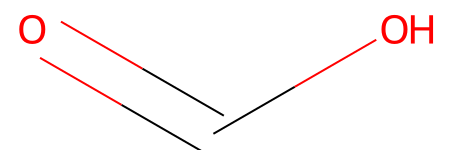

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

smile = 'C(=O)O' # formic 
mol = Chem.MolFromSmiles(smile)
mol

## Node and Edge Features

<p align="center">
  <img src="https://drive.google.com/uc?id=10iiTNDL9CyCP1Nnq_S4cWr5AEJPehShZ" />
</p>



## Using Libraries
---


1.   [DGL - pytorch, mxnet](https://github.com/dmlc/dgl) - dgllife
2.   [Geometric - pytorch](https://pytorch-geometric.readthedocs.io/en/latest/)
3.   [Spektral - tensorflow](https://github.com/danielegrattarola/spektral)




In [ ]:

from dgllife.utils import CanonicalAtomFeaturizer, CanonicalBondFeaturizer, smiles_to_bigraph, mol_to_bigraph 

"""
    BaseAtomFeaturizer, BaseBondFeaturizer
    CanonicalAtomFeaturizer, CanonicalBondFeaturizer
    WeaveAtomFeaturizer, WeaveBondFeaturizer -> Steven et. al. 2016
    PreTrainAtomFeaturizer, PreTrain
    AttentiveFPAtomFeaturizer, AttentiveFPBondFeaturizer -> 
"""


atom_featurizer = CanonicalAtomFeaturizer('atom_feat')
edge_featurizer = CanonicalBondFeaturizer('edge_feat')



In [ ]:
g = mol_to_bigraph(mol, 
                   node_featurizer=atom_featurizer, 
                   edge_featurizer=edge_featurizer)
g

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'atom_feat': Scheme(shape=(74,), dtype=torch.float32)}
      edata_schemes={'edge_feat': Scheme(shape=(12,), dtype=torch.float32)})

In [ ]:
g.ndata['atom_feat']

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 

In [ ]:
g.edata['edge_feat']

tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
atom_featurizer(mol)


{'atom_feat': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
          0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
          0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
edge_featurizer(mol)

{'edge_feat': tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.]])}

> **WHAT I CAN NOT CREATE, I DO NOT UNDERSTAND**
>> Richard Feynman

## Atom Features
---

|    Node Features  |   Elements|
|------|------|
|   atom  | C, O, N, S, F, Cl, Br, ..,  etc| 
|   Formal Charge  | -1, 0, +1| 
|   Implicit H  | 0, 1, 2 ,3 , 4, 5, 6|
|   Chirality  | None, S, R| 
|   Degree of Atom  | topological feature|
|   etc.  | etc. |




## **Node Featurizer (Atom)**

In [ ]:
from enum import Enum, unique


@unique
class Atoms(Enum):
    CARBON = 'C'
    OXYGEN = 'O'
    NITROGEN = 'N'
    SULFUR = 'S'
    FLOURINE = 'F'
    CHLORINE = 'Cl'
    BROMINE = 'Br'
    # you can add based on your research
    # SODIUM = 'Na'

@unique
class Charges(Enum):
    MINUS = -1
    ZERO = 0
    PLUS = 1

@unique
class Chirality(Enum):
    NONE = 'None'
    S = 'S'
    R = 'R'

@unique
class ImplicitH(Enum):
    SINGLE = 0
    DOUBLE = 1
    TRIPLE = 2

@unique
class YourEnum(Enum):
    NotImplemented


# chosen list
atom_list = [atom.value for atom in Atoms]
charge_list = [charge.value for charge in Charges]
chiralirty_list = [c.value for c in Chirality]
impH_list = [impH.value for impH in ImplicitH]




In [ ]:
from typing import Any, List
## one hot encoder function
def to_ohe(x: Any, _list: List) -> List:
    return list(map(lambda s: x ==s, _list))


In [ ]:
print(atom_list)
to_ohe('C', atom_list)


['C', 'O', 'N', 'S', 'F', 'Cl', 'Br']


[True, False, False, False, False, False, False]

### BASE BONE CLASS

In [ ]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem

MOLTYPE = Chem.rdchem.Mol

@dataclass
class NodeFeaturizer_V1:
    """
    Tutorial NodeFeaturizer Class

    Arguments:
    ---------
    atoms: 
        list contains atom types specifically chosen for this tutorial
    charges:
        list contains formal charges values
    impliciti_h: 
        list contains implicit_h values
    chirality:
        list contains chirality
    """

    atoms: List = field(default_factory=lambda: atom_list)
    charges: List = field(default_factory=lambda: charge_list)
    implicit_h: List = field(default_factory=lambda: impH_list)
    chirality: List = field(default_factory=lambda: chiralirty_list)
    
    def __call__(self, mol: MOLTYPE):
        # instance caller 

        if mol:
            nodes = mol.GetNumAtoms()

            return nodes
        else:
            print("You need to enter some mol")
        
    def node_features_from_atom_type(self, node: Chem.rdchem.Atom) -> List:
        # converting atom type features to one hot vector
        NotImplemented

    def node_features_from_formal_charge(self, node: Chem.rdchem.Atom) -> List:
        # converting atom formal charge one hot vector
        NotImplemented

    def node_features_from_implicit_h(self, node: Chem.rdchem.Atom) -> List:
        # converting atom implicit_h to one hot vector
        NotImplemented

    def node_features_from_chirality(self, node: Chem.rdchem.Atom) -> List:
        NotImplemented

class _NodeFeaturizer(object):

    def __init__(self, atoms=atom_list, charges=charge_list):
        self._atoms = atoms
        self._charges = charges



In [ ]:
# instance initialization
foo = NodeFeaturizer_V1()
foo

NodeFeaturizer_V1(atoms=['C', 'O', 'N', 'S', 'F', 'Cl', 'Br'], charges=[-1, 0, 1], implicit_h=[0, 1, 2], chirality=['None', 'S', 'R'])

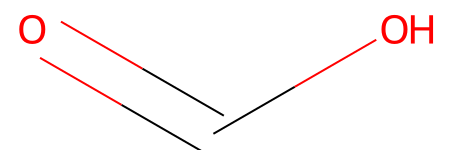

In [ ]:
mol

In [ ]:
foo(mol)

3

### IMPROVMENT ON CLASS (Node Features to OHE - one-hot-encoding)

*   List item
*   List item



In [ ]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem
from collections import defaultdict
import itertools
import numpy as np
import dgl.backend as F

MOLTYPE = Chem.rdchem.Mol
@dataclass
class NodeFeaturizer_V2:
    """
    Tutorial NodeFeaturizer Class

    Arguments:
    ---------
    atoms: 
        list contains atom types specifically chosen for this tutorial
    charges:
        list contains formal charges values
    impliciti_h: 
        list contains implicit_h values
    chirality:
        list contains chirality
    """

    atoms: List = field(default_factory=lambda: atom_list)
    charges: List = field(default_factory=lambda: charge_list)
    implicit_h: List = field(default_factory=lambda: impH_list)
    chirality: List = field(default_factory=lambda: chiralirty_list)


    def __call__(self, mol: MOLTYPE):

        if mol:
            

            # nodes = mol.GetNumAtoms()

            # return nodes
            
            features = defaultdict(list)
            for node in mol.GetAtoms():
                print(node.GetSymbol())

                _iter = itertools.chain(
                    self.node_features_from_atom_type(node),
                    self.node_features_from_formal_charge(node),
                    self.node_features_from_implicit_h(node),
                    self.node_features_from_chirality(node)
                )

                feature_vector = np.fromiter(_iter, int)

                features['node_feats'].append(feature_vector)
            
            return features

        else:
            print("You need to enter some mol")


    def node_features_from_atom_type(self, node: Chem.rdchem.Atom) -> List:

        # converting atom type features to one hot vector
        return to_ohe(node.GetSymbol(), self.atoms)

    def node_features_from_formal_charge(self, node: Chem.rdchem.Atom) -> List:

        # converting atom formal charge feature to one hot vector
        return to_ohe(node.GetFormalCharge(), self.charges)

    def node_features_from_implicit_h(self, node: Chem.rdchem.Atom) -> List:

        # converting implicith feature to one hot vector
        return to_ohe(node.GetTotalNumHs(), self.implicit_h)

    def node_features_from_chirality(self, node: Chem.rdchem.Atom) -> List:
        try:
            chiral_state = node.GetProp("_CIPCode")
        except KeyError:
            chiral_state = self.chirality[0]  # "None"

        return to_ohe(chiral_state, self.chirality)


    # def node_features_to_ohe(self, node:Chem.rdchem.Atom, name:str) -> List:

    #     if name == 'atom_type':
    #         return to_ohe(node.GetSymbol(), self.atoms)
    #     elif name == 'charge':
    #         return to_ohe(node.GetFormalCharge(), self.charge)
    #     elif name == 'impH':
    #         return to_ohe(node.GetTotalNumberHs(), self.implicit_h)
    #     elif name == 'chirality'
    #         try:
    #             chiral_state = node.GetProp("_CIPCode")
    #         except KeyError:
    #                 chiral_state = self._chirality[0]  # "None"

    #         return to_ohe(chiral_state, self.chirality)
    #     else:
    #         raise ValueError('Not supported type name')
     




In [ ]:
bar = NodeFeaturizer_V2()
bar

NodeFeaturizer_V2(atoms=['C', 'O', 'N', 'S', 'F', 'Cl', 'Br'], charges=[-1, 0, 1], implicit_h=[0, 1, 2], chirality=['None', 'S', 'R'])

In [ ]:
bar(mol)

C
O
O


defaultdict(list,
            {'node_feats': [array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]),
              array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]),
              array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])]})

### Final Version: 
---

In [ ]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem
from collections import defaultdict
import itertools
import numpy as np
import dgl.backend as F

MOLTYPE = Chem.rdchem.Mol

## Final NodeFeaturizer
@dataclass
class NodeFeaturizer:
    """
    Tutorial NodeFeaturizer Class

    Arguments:
    ---------
    atoms: 
        list contains atom types specifically chosen for this tutorial
    charges:
        list contains formal charges values
    impliciti_h: 
        list contains implicit_h values
    chirality:
        list contains chirality
    """

    name: str = 'node_features'
    atoms: List = field(default_factory=lambda: atom_list)
    charges: List = field(default_factory=lambda: charge_list)
    implicit_h: List = field(default_factory=lambda: impH_list)
    chirality: List = field(default_factory=lambda: chiralirty_list)


    def __call__(self, mol: MOLTYPE):

        if mol:
            
            features = defaultdict(list)

            for node in mol.GetAtoms():
                _iter = itertools.chain(
                    self.node_features_from_atom_type(node),
                    self.node_features_from_formal_charge(node),
                    self.node_features_from_implicit_h(node),
                    self.node_features_from_chirality(node)
                )

                feature_vector = np.fromiter(_iter, int)
                features[self.name].append(feature_vector)

            last_features = defaultdict(list)

            for key, items in features.items():
                values = np.stack(items)
                last_features[key] = F.zerocopy_from_numpy(values.astype(np.float32))
            return last_features

        else:
            print("You need to enter some mol")


    def node_features_from_atom_type(self, node: Chem.rdchem.Atom) -> List:

        # converting atom type features to one hot vector
        return to_ohe(node.GetSymbol(), self.atoms)

    def node_features_from_formal_charge(self, node: Chem.rdchem.Atom) -> List:

        # converting atom formal charge feature to one hot vector
        return to_ohe(node.GetFormalCharge(), self.charges)

    def node_features_from_implicit_h(self, node: Chem.rdchem.Atom) -> List:

        # converting implicith feature to one hot vector
        return to_ohe(node.GetTotalNumHs(), self.implicit_h)

    def node_features_from_chirality(self, node: Chem.rdchem.Atom) -> List:
        try:
            chiral_state = node.GetProp("_CIPCode")
        except KeyError:
            chiral_state = self.chirality[0]  # "None"

        return to_ohe(chiral_state, self.chirality)




In [ ]:
zoo = NodeFeaturizer()
zoo(mol)


defaultdict(list,
            {'node_features': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
                     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
                     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])})

In [ ]:
zoo(mol)['node_features'].size()

torch.Size([3, 16])

<p align="center">
  <img src="https://drive.google.com/uc?id=1yzszhfwOuZWxpEvTWdYpVIynjyYu-ZTH" />
</p>



## **Edge Featurizer (Bond)**
---
## Atom Features

|    Bond Features  |   Elements|
|------|------|
|   Bond Types  | Single, Double, Triple, Aromatic, ..,  etc| 
|   etc.  | etc. |

In [ ]:

from enum import Enum, unique
from rdkit.Chem import BondType


BONDTYPE = Chem.BondType

@unique
class Bonds(Enum):
    SINGLE = BondType.SINGLE
    DOUBLE = BondType.DOUBLE
    TRIPLE = BondType.TRIPLE
    AROMATIC = BondType.AROMATIC


bond_types = [bond.value for bond in Bonds]



In [ ]:
bond_types

[rdkit.Chem.rdchem.BondType.SINGLE,
 rdkit.Chem.rdchem.BondType.DOUBLE,
 rdkit.Chem.rdchem.BondType.TRIPLE,
 rdkit.Chem.rdchem.BondType.AROMATIC]

In [ ]:

@dataclass
class EdgeFeaturizer:
    """
    Tutorial NodeFeaturizer Class

    Arguments:
    ---------
    name: str
        name in feature dictionary
    bonds: List[BondType]
        list contains bondtype types specifically chosen for this tutorial
   
    """
    name: str = 'edge_features'
    bonds: List = field(default_factory=lambda: bond_types)

    def __call__(self, mol:MOLTYPE):

        if mol:
            features = defaultdict(list)
            for bond in mol.GetBonds():
                btype = bond_types.index(bond.GetBondType())
                
                _iter = itertools.chain(
                    self.edge_features_from_bond_type(bond)
                )

                feature_vector = np.fromiter(_iter, int)

                # One bond between atom u and v corresponds to two edges (u, v) and (v, u)
                features[self.name].extend([feature_vector, feature_vector.copy()])

            last_features = defaultdict(list)

            for key, items in features.items():
                values = np.stack(items)
                last_features[key] = F.zerocopy_from_numpy(values.astype(np.float32))
            return last_features


        else:
            raise ValueError
    
    def edge_features_from_bond_type(self, edge):
        
        return to_ohe(edge.GetBondType(), self.bonds)



In [ ]:
e = EdgeFeaturizer()
e(mol)


defaultdict(list, {'edge_features': tensor([[0., 1., 0., 0.],
                     [0., 1., 0., 0.],
                     [1., 0., 0., 0.],
                     [1., 0., 0., 0.]])})

<p align="center">
  <img src="https://drive.google.com/uc?id=1g1RWRnLaSi0qjWfcOZ5xL1tkYaC5iyyb" />
</p>


In [ ]:
my_node_featurizer = NodeFeaturizer()
my_edge_featurizer = EdgeFeaturizer()

my_node_featurizer(mol), my_edge_featurizer(mol)

(defaultdict(list,
             {'node_features': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
                      [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
                      [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])}),
 defaultdict(list, {'edge_features': tensor([[0., 1., 0., 0.],
                      [0., 1., 0., 0.],
                      [1., 0., 0., 0.],
                      [1., 0., 0., 0.]])}))

In [ ]:


def to_dgl_graph(mol, node_featurizer=None, edge_featurizer=None) -> dgl.DGLGraph:
    
    # graph with empty (u, v)
    g = dgl.graph(([], []), idtype=torch.int32)

     # if not mol:
    #     raise ValueError

     # Add nodes
    num_atoms = mol.GetNumAtoms()
    g.add_nodes(num_atoms)

    # Add edges
    src_list = []
    dst_list = []
    num_bonds = mol.GetNumBonds()
    for i in range(num_bonds):
        bond = mol.GetBondWithIdx(i)
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        src_list.extend([u, v])
        dst_list.extend([v, u])

    g.add_edges(torch.IntTensor(src_list), torch.IntTensor(dst_list))

    # add node featurizer
    g.ndata.update(node_featurizer(mol))
    # add edge featurizer
    g.edata.update(edge_featurizer(mol))

    return g




In [ ]:
my_graph = to_dgl_graph(mol,
                        # your own featurizers that you have just created
                        node_featurizer=my_node_featurizer,
                        edge_featurizer=my_edge_featurizer,
                        )


In [ ]:
my_graph


Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)})

In [ ]:
my_graph.ndata

{'node_features': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])}

In [ ]:

from typing import Union, Optional, Callable

def check(f):
  
    def decorator(*args, **kwargs):
        if isinstance(args[0], str):
            mol = read_smi(args[0])
            return f(mol, **kwargs)

        return f(*args, **kwargs)

    return decorator

def read_smi(smi: str) -> Union[MOLTYPE, None]:
    """
    Reads SMILE into RDKIT mol object
    :param
        smi:
            The string molecule for which to read.
    :return:
        moltype:
            RDKit mol object
    """

    if len(smi) == 0:
        return None

    mol = Chem.MolFromSmiles(smi)

    if mol is None:
        return None

    return mol


## function that can take both smile and mol type at same time
@check
def to_graph(compound: Optional[str] = MOLTYPE, node_featurizer=None, edge_featurizer=None) -> dgl.DGLGraph:

    # graph with empty (u, v)
    g = dgl.graph(([], []), idtype=torch.int32)

    num_atoms = compound.GetNumAtoms()
    g.add_nodes(num_atoms)

    # Add edges
    src_list = []
    dst_list = []
    num_bonds = compound.GetNumBonds()
    for i in range(num_bonds):
        bond = compound.GetBondWithIdx(i)
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        src_list.extend([u, v])
        dst_list.extend([v, u])

    g.add_edges(torch.IntTensor(src_list), torch.IntTensor(dst_list))

    # add node featurizer
    g.ndata.update(node_featurizer(compound))
    # add edge featurizer
    g.edata.update(edge_featurizer(compound))

    return g




In [ ]:
smile = 'C(=O)O' # formic 
mol = Chem.MolFromSmiles(smile)


last_graph_from_mol = to_graph(mol,  
                               node_featurizer=my_node_featurizer,
                               edge_featurizer=my_edge_featurizer)

last_graph_from_smile = to_graph(smile,
                                 node_featurizer=my_node_featurizer,
                                 edge_featurizer=my_edge_featurizer)



In [ ]:
last_graph_from_smile

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)})

In [ ]:
last_graph_from_mol

Graph(num_nodes=3, num_edges=4,
      ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
      edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)})

# HOMEWORK

In [ ]:

## HOMEWORK CODE is originated from https://bit.ly/3khbBI6 (https://iwatobipen.wordpress.com/)
## ALL CREDITS GO to seritaka@gmail.com, https://github.com/iwatobipen 
## CAUTION original codes uses dgl 0.4
## homework code uses dgl>0.5 where (dgl.data.chem.utils changed to dgllife.util)

import os
from rdkit import RDPaths

train_data = os.path.join(RDPaths.RDDocsDir, 'Book/data/solubility.train.sdf')
test_data = os.path.join(RDPaths.RDDocsDir, 'Book/data/solubility.test.sdf')

In [ ]:
train = [mol for mol in Chem.SDMolSupplier(train_data)]
test = [mol for mol in Chem.SDMolSupplier(test_data)]

In [ ]:

# use your to_graph augmentation for training

train_mols = Chem.SDMolSupplier(train_data)
train_smi =[Chem.MolToSmiles(m) for m in train_mols]
train_y = torch.tensor([float(mol.GetProp('SOL')) for mol in train_mols]).reshape(-1,1)
 
test_mols =  Chem.SDMolSupplier(test_data)
test_smi = [Chem.MolToSmiles(m) for m in test_mols]
test_y = torch.tensor([float(mol.GetProp('SOL')) for mol in test_mols]).reshape(-1,1)
 
train_graph = [to_graph(mol,  
                        node_featurizer=my_node_featurizer,
                        edge_featurizer=my_edge_featurizer) for mol in train_mols]

test_graph = [to_graph(mol,  
                       node_featurizer=my_node_featurizer,
                       edge_featurizer=my_edge_featurizer) for mol in test_mols]


In [ ]:
train_graph[:10]

[Graph(num_nodes=5, num_edges=8,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=5, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=6, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=6, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes=6, num_edges=10,
       ndata_schemes={'node_features': Scheme(shape=(16,), dtype=torch.float32)}
       edata_schemes={'edge_features': Scheme(shape=(4,), dtype=torch.float32)}),
 Graph(num_nodes

In [ ]:

from dgllife.model import AttentiveFPPredictor

"""
    AttentiveFP is introduced in
    `Pushing the Boundaries of Molecular Representation for Drug Discovery with the Graph
    Attention Mechanism. <https://www.ncbi.nlm.nih.gov/pubmed/31408336>`__

"""

model = AttentiveFPPredictor(node_feat_size=16,
                            edge_feat_size=4,
                            num_layers=2,
                            num_timesteps=2,
                            graph_feat_size=200,
                            # output_size=1,
                            dropout=0.2)
# model = model.to('cuda:0')
model

AttentiveFPPredictor(
  (gnn): AttentiveFPGNN(
    (init_context): GetContext(
      (project_node): Sequential(
        (0): Linear(in_features=16, out_features=200, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
      )
      (project_edge1): Sequential(
        (0): Linear(in_features=20, out_features=200, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
      )
      (project_edge2): Sequential(
        (0): Dropout(p=0.2, inplace=False)
        (1): Linear(in_features=400, out_features=1, bias=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (attentive_gru): AttentiveGRU1(
        (edge_transform): Sequential(
          (0): Dropout(p=0.2, inplace=False)
          (1): Linear(in_features=200, out_features=200, bias=True)
        )
        (gru): GRUCell(200, 200)
      )
    )
    (gnn_layers): ModuleList(
      (0): GNNLayer(
        (project_edge): Sequential(
          (0): Dropout(p=0.2, inplace=False)
          (1): Linear(in_features=400, out_fea

In [ ]:
def collate_molgraphs(data):
    

    assert len(data[0]) in [3, 4], \
        'Expect the tuple to be of length 3 or 4, got {:d}'.format(len(data[0]))
    if len(data[0]) == 3:
        smiles, graphs, labels = map(list, zip(*data))
        masks = None
    else:
        smiles, graphs, labels, masks = map(list, zip(*data))
 
    bg = dgl.batch(graphs)
    bg.set_n_initializer(dgl.init.zero_initializer)
    bg.set_e_initializer(dgl.init.zero_initializer)
    labels = torch.stack(labels, dim=0)
     
    if masks is None:
        masks = torch.ones(labels.shape)
    else:
        masks = torch.stack(masks, dim=0)
    return smiles, bg, labels, masks


In [ ]:
from dgllife.utils import Meter
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=list(zip(train_smi, train_graph, train_y)),
                          batch_size=128,
                          shuffle=True,
                          collate_fn=collate_molgraphs,
                          )
test_loader = DataLoader(dataset=list(zip(test_smi, test_graph, test_y)),
                          batch_size=128,
                          shuffle=True,
                          collate_fn=collate_molgraphs,
                          )

def run_a_train_epoch(n_epochs, epoch, model, data_loader,loss_criterion, optimizer):
    model.train()
    total_loss = 0
    losses = []
    
    for batch_id, batch_data in enumerate(data_loader):
        batch_data
        smiles, bg, labels, masks = batch_data
        if torch.cuda.is_available():
            bg.to(torch.device('cuda:0'))
            labels = labels.to('cuda:0')
            masks = masks.to('cuda:0')
        
        prediction = model(bg, bg.ndata['node_features'], bg.edata['edge_features'])
        loss = (loss_criterion(prediction, labels)*(masks != 0).float()).mean()
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data.item())
        
    total_score = np.mean(losses)
    print('epoch {:d}/{:d}, training {:.4f}'.format( epoch + 1, n_epochs,  total_score))
    return total_score


In [ ]:
from torch import nn
loss_fn = nn.MSELoss(reduction='none')
optimizer = torch.optim.Adam(model.parameters(), lr=10 ** (-2.5), weight_decay=10 ** (-5.0),)
n_epochs = 10 # change it to 100
epochs = []
scores = []
for e in range(n_epochs):
    score = run_a_train_epoch(n_epochs, e, model, train_loader, loss_fn, optimizer)
    epochs.append(e)
    scores.append(score)

epoch 1/10, training 3.7580
epoch 2/10, training 2.5006
epoch 3/10, training 2.3966
epoch 4/10, training 1.5426
epoch 5/10, training 1.2313
epoch 6/10, training 1.2281
epoch 7/10, training 1.0925
epoch 8/10, training 0.9467
epoch 9/10, training 1.2796
epoch 10/10, training 0.9889
